## Week 2


I decided to use spearman correlation analysis because in general ChIP-seq signals are non-linear. In addition, it is much more robust to outliers than pearson correlation. 

I used bedtools intersect because it is more stirngent than bedtools merge, it only includes peaks that are called in both replicates. In addition, I also added a requirement of 50% reciprocal overlap to ensure that peaks are not only overlapping marginally but are spatially consistent. 

## Week 3

### Signal Intensity

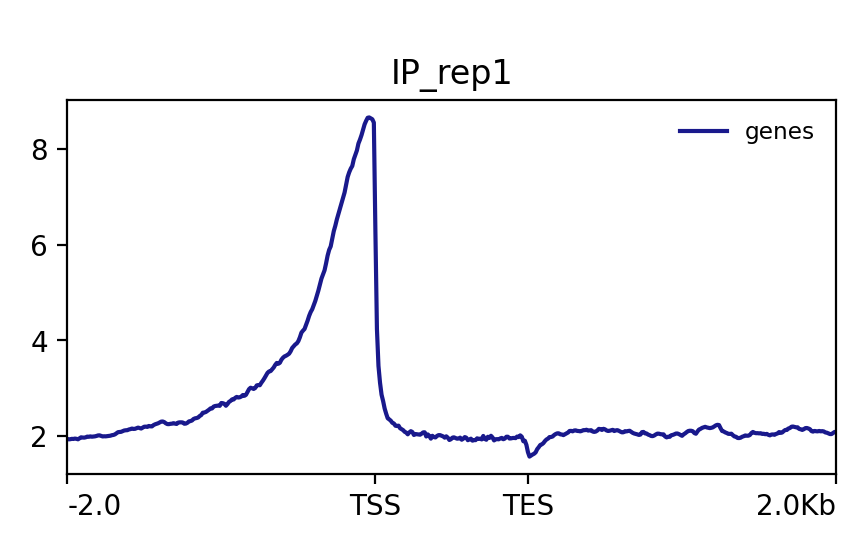

In [27]:
from IPython.display import display
from PIL import Image

rep1_counts = Image.open("/projectnb/bf528/students/nhwong/project-2-Nathan2400912/full_results/rep1_counts.png")
display(rep1_counts)

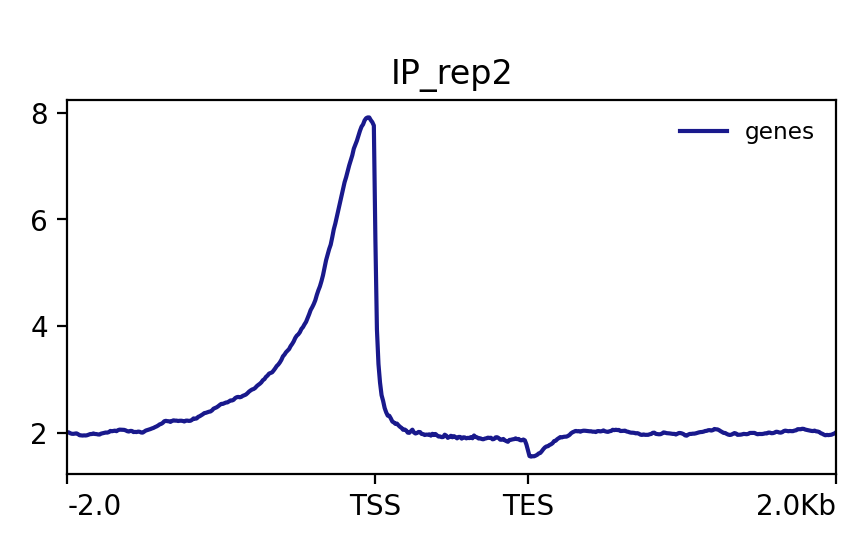

In [2]:
rep2_counts = Image.open("/projectnb/bf528/students/nhwong/project-2-Nathan2400912/full_results/rep2_counts.png")
display(rep2_counts)

The figures present a metagene profile plot generated using computeMatrix followed by plotProfile from the deepTools suite. The x axis represents the genomic region surrounding the TSS and TES, spanning from -2 kb upstream to +2 kb downstream. The y axis shows the signal intensity, likely representing normalized ChIP-seq read coverage. The sharp peak at the TSS suggests strong enrichment of the target protein or histone modification in this region, indicating preferential binding near gene promoters. This pattern usually represents transcription factors or histone modifications associated with active transcription initiation.

In [3]:
import pandas as pd

motifs = pd.read_csv("/projectnb/bf528/students/nhwong/project-2-Nathan2400912/full_results/homer_motifs/knownResults.txt", sep='\t')

In [5]:
motifs.head(10)

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 1212),% of Target Sequences with Motif,# of Background Sequences with Motif(of 43902),% of Background Sequences with Motif
0,"GATA3(Zf),DR8/iTreg-Gata3-ChIP-Seq(GSE20898)/H...",AGATSTNDNNDSAGATAASN,1.000000e-47,-109.30,0.0,64.0,5.28%,180.0,0.41%
1,RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer,SAAACCACAG,1.000000e-46,-106.10,0.0,208.0,17.16%,2440.1,5.56%
2,RUNX1(Runt)/Jurkat-RUNX1-ChIP-Seq(GSE29180)/Homer,AAACCACARM,1.000000e-23,-54.47,0.0,205.0,16.91%,3494.1,7.95%
3,RUNX2(Runt)/PCa-RUNX2-ChIP-Seq(GSE33889)/Homer,NWAACCACADNN,1.000000e-21,-48.45,0.0,178.0,14.69%,2989.2,6.81%
4,NFIL3(bZIP)/HepG2-NFIL3-ChIP-Seq(Encode)/Homer,VTTACGTAAYNNNNN,1.000000e-20,-46.19,0.0,119.0,9.82%,1648.0,3.75%
5,RUNX-AML(Runt)/CD4+-PolII-ChIP-Seq(Barski_et_a...,GCTGTGGTTW,1.000000e-18,-42.68,0.0,154.0,12.71%,2558.5,5.82%
6,"ERE(NR),IR3/MCF7-ERa-ChIP-Seq(Unpublished)/Homer",VAGGTCACNSTGACC,1.000000e-17,-40.79,0.0,80.0,6.60%,927.6,2.11%
7,Sox10(HMG)/SciaticNerve-Sox3-ChIP-Seq(GSE35132...,CCWTTGTYYB,1.000000e-16,-38.61,0.0,247.0,20.38%,5202.0,11.84%
8,CREB5(bZIP)/LNCaP-CREB5.V5-ChIP-Seq(GSE137775)...,VVATGACGTCAT,1.000000e-16,-38.12,0.0,108.0,8.91%,1580.2,3.60%
9,LHY(Myb)/Seedling-LHY-ChIP-Seq(GSE52175)/Homer,ADAAATATCT,1.000000e-16,-37.22,0.0,158.0,13.04%,2826.4,6.43%


From these top ten enriched motifs identified with HOMER motif analysis, we see that the top 4 are GATA3, RUNX1, and RUNX2 motifs. These suggest potential binding of GATA and RUNX family transcription factors, which are known to regulate gene expression in immune responses, differentiation, and development. RUNX factors, in particular, are critical in hematopoiesis and cancer. Other than that, other motifs also have do with circadian rhythms, estrogen related factors, and a few other responses. 

In general, these enriched motifs suggest that the TFs regulating the target sequences are likely involved in immune regulation, development, differentiation, and hormonal responses. In addition, the strong enrichment of RUNX and GATA3 motifs might indicate that the TFs are related to hematopoietic or immune-related processes.



## Week 4

### Methods

Initial quality control was performed with FastQC (v0.12.1) to assess read quality. Adapter trimming and quality filtering were conducted using Trimmomatic (v0.39) in single-end mode. Trimmed reads were then written to compressed output files, with detailed trimming logs generated for quality assessment. For mapping, reads were aligned to the reference genome (hg38) using Bowtie2 (v2.5.4) in end-to-end mode. The resulting alignments were then processed with samtools (v1.21) for sorting, indexing, and duplicate marking. Moreover, all alignment statistics were aggregated using MultiQC (v1.25) for comprehensive quality assessment. 

Following alignment, peak calling was performed with MACS3 (v3.0.2) where input controls were included for background correction. To identify high-confidence peaks, biological replicates were compared using bedtools intersect (v2.31.1) with a stringent criteria (-f 0.5 -r) which retains only peaks with ≥50% reciprocal overlap between replicates. Artifactual peaks in blacklisted regions (bed file from the Boyle Lab) were also removed using bedtools intersect, generating the final set of filtered peaks.

For downstream analysis, peaks were annotated to genomic features using HOMER (v4.11) and a reference gtf annotation file (version 45 of GENCODE annotation). De novo motif discovery was performed with HOMER's findMotifsGenome.pl to identify enriched transcription factor binding motifs. Normalized coverage profiles were then generated using deepTools bamCoverage (v3.5.5). To visualize signal patterns, computeMatrix scale-regions was used with a 2 kb window around regions of interest, and aggregate profiles were plotted with plotProfile. Lastly, sample reproducibility was assessed through spearman correlation of read counts using plotCorrelation.

### MultiQC

**General Sequencing Metrics**
<br>
The dataset includes four samples with total mapped reads ranging from 9.9 million to 30.1 million. We can see that the IP replicates exhibited significantly higher duplication rates (IP_rep1: 89.1%, IP_rep2: 74.3%) compared to INPUT samples (~10–13%), suggesting potential PCR over-amplification or biased enrichment in the IP libraries. GC content was consistent across samples (43–47%), within typical ranges for most sequencing libraries.

**Sequence Quality**
<br>
Per base sequence Quality and per sequence quality scores indicate high-quality reads. Phred scores remained above 30 across all base positions, which is very good compared to the standard threshold. Moreover, no samples showed significant dips in quality at read termini, suggesting minimal degradation or adapter contamination. In contrast, per base sequence content has major issues. In both control samples, they show strong AT bias where both approach 28% whilst GC is around 22%. 

**GC Content and Duplication and Overrepresentation** <br>
Per sequence GC content distributions appeared roughly normal for the IP samples, with no aberrant peaks indicative of contamination or technical artifacts. However for teh control samples, as seen in the per base distribution as well, the percent GC content is much lower than the standard. 

Furthermore, sequence duplication levels also highlighted stark differences: IP_rep1 showed >89% duplication, far exceeding acceptable thresholds for most assays. Such high duplication likely reflects over-sequencing of limited unique fragments that is common in IP-based protocols like ChIP-seq. In contrast, control samples exhibited low duplication (~10%), aligning with expectations for non-enriched controls. Similarly, there is high amounts of sequence overrepresentation in the IP samples with top overrepresented sequences taking up to 3% of total sequences.

### Overlapping RNA Seq and ChIP-seq

In [1]:
import pandas as pd
rnaseq_results = pd.read_csv('./refs/GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt', sep='\t')
rnaseq_results

,genename,transcript,log2FoldChange,padj
0,OARD1,NM_145063,0.186841,0.545806
1,WBSCR22,"NM_001202560,NM_017528,NR_037776,NR_045512",0.037881,0.907305
2,PIGZ,NM_025163,0.122346,0.841445
3,PRDX5,"NM_012094,NM_181651,NM_181652",0.250313,0.118073
4,PEX16,"NM_004813,NM_057174",-0.300675,0.183572
...,...,...,...,...
15429,BCKDK,"NM_001122957,NM_001271926,NM_005881",0.466932,0.019819
15430,SDK1,"NM_001079653,NM_152744",0.016101,0.952858
15431,ACSBG2,"NM_001289177,NM_001289178,NM_001289179,NM_0012...",0.161475,NaN
15432,SPATA6,"NM_001286238,NM_001286239,NM_019073",0.280537,0.671884


In [30]:
chipseq_peaks = pd.read_csv('./full_results/peak_annotations.txt', sep='\t')
chipseq_peaks

,PeakID (cmd=annotatePeaks.pl filtered_peaks.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,rep1_peak_205,KI270317.1,1274,1573,+,1736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rep1_peak_196,KI270310.1,47,1181,+,1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rep1_peak_287,KI270466.1,13,1205,+,1546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rep1_peak_44,GL000216.2,149462,149842,+,1367,NaN,Intergenic,Intergenic,-56343.0,ENST00000611062.1,ENSG00000274202,ENST00000611062,NaN,NaN,U2,NaN,NaN,snRNA
4,rep1_peak_206,KI270317.1,36312,36848,+,1361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,rep1_peak_7969,chr4,54969400,54969606,+,16,NaN,Intergenic,Intergenic,6868.0,ENST00000484463.3,ENSG00000244422,ENST00000484463,NaN,NaN,RPL38P3,NaN,NaN,processed_pseudogene
1208,rep1_peak_5678,chr2,111698935,111699076,+,16,NaN,promoter-TSS (ENST00000644013.1),lncRNA-promoter-TSS (ENST00000644013.1),28.0,ENST00000644013.1,ENSG00000285016,ENST00000645914,NaN,NaN,ENSG00000285016,NaN,NaN,lncRNA
1209,rep1_peak_9567,chr6,148554929,148555059,+,16,NaN,Intergenic,Intergenic,12660.0,ENST00000407465.1,ENSG00000217824,ENST00000407465,NaN,NaN,SNRPEP6,NaN,NaN,processed_pseudogene
1210,rep1_peak_10339,chr8,79765338,79765498,+,14,NaN,TTS (ENST00000518733.1),protein_coding-TTS (ENST00000518733.1),1057.0,ENST00000674192.1,ENSG00000164683,ENST00000674295,NaN,NaN,HEY1,NaN,NaN,protein_coding


In [28]:
ref = pd.read_csv('./refs/mouse_reference.tsv', sep='\t')
ref['Ensembl_ID'] = ref['Ensembl_ID'].str.replace('\..*', '', regex=True)
ref

,Ensembl_ID,Gene_Name
0,ENSG00000290825,DDX11L2
1,ENSG00000223972,DDX11L1
2,ENSG00000227232,WASH7P
3,ENSG00000278267,MIR6859-1
4,ENSG00000243485,MIR1302-2HG
...,...,...
63236,ENSG00000276017,ENSG00000276017
63237,ENSG00000278817,ENSG00000278817
63238,ENSG00000277196,ENSG00000277196
63239,ENSG00000278625,U6


In [29]:
rnaseq_results = pd.merge(rnaseq_results, ref, left_on='genename', right_on='Gene_Name')
rnaseq_results

,genename,transcript,log2FoldChange,padj,Ensembl_ID,Gene_Name
0,OARD1,NM_145063,0.186841,0.545806,ENSG00000124596,OARD1
1,PIGZ,NM_025163,0.122346,0.841445,ENSG00000119227,PIGZ
2,PRDX5,"NM_012094,NM_181651,NM_181652",0.250313,0.118073,ENSG00000126432,PRDX5
3,PEX16,"NM_004813,NM_057174",-0.300675,0.183572,ENSG00000121680,PEX16
4,SLC35G2,"NM_001097599,NM_001097600,NM_025246",0.397400,NaN,ENSG00000168917,SLC35G2
...,...,...,...,...,...,...
14040,BCKDK,"NM_001122957,NM_001271926,NM_005881",0.466932,0.019819,ENSG00000103507,BCKDK
14041,SDK1,"NM_001079653,NM_152744",0.016101,0.952858,ENSG00000146555,SDK1
14042,ACSBG2,"NM_001289177,NM_001289178,NM_001289179,NM_0012...",0.161475,NaN,ENSG00000130377,ACSBG2
14043,SPATA6,"NM_001286238,NM_001286239,NM_019073",0.280537,0.671884,ENSG00000132122,SPATA6


In [33]:
chipseq_peaks = chipseq_peaks[chipseq_peaks['Entrez ID'].notna()]
merged_df = pd.merge(chipseq_peaks, rnaseq_results, left_on='Entrez ID', right_on='Ensembl_ID', how='left')
print(len(merged_df))
merged_df = merged_df[merged_df['log2FoldChange'].notna()]
merged_df

1058


,PeakID (cmd=annotatePeaks.pl filtered_peaks.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Name,Gene Alias,Gene Description,Gene Type,genename,transcript,log2FoldChange,padj,Ensembl_ID,Gene_Name
5,rep1_peak_784,chr1,120069582,120069905,+,1030,NaN,promoter-TSS (ENST00000256646.7),protein_coding-promoter-TSS (ENST00000256646.7),-81.0,...,NOTCH2,NaN,NaN,protein_coding,NOTCH2,"NM_001200001,NM_024408",0.071906,7.498189e-01,ENSG00000134250,NOTCH2
18,rep1_peak_1678,chr1,205211367,205211855,+,666,NaN,promoter-TSS (ENST00000367161.7),protein_coding-promoter-TSS (ENST00000367161.7),-45.0,...,DSTYK,NaN,NaN,protein_coding,DSTYK,"NM_015375,NM_199462",-0.106713,4.805147e-01,ENSG00000133059,DSTYK
28,rep1_peak_3985,chr16,11915942,11916277,+,507,NaN,promoter-TSS (ENST00000420576.6),protein_coding-promoter-TSS (ENST00000420576.6),-27.0,...,GSPT1,NaN,NaN,protein_coding,GSPT1,"NM_001130006,NM_001130007,NM_002094",0.332402,2.658594e-02,ENSG00000103342,GSPT1
37,rep1_peak_3836,chr15,50354925,50355533,+,467,NaN,promoter-TSS (ENST00000220429.12),protein_coding-promoter-TSS (ENST00000220429.12),24.0,...,GABPB1-AS1,NaN,NaN,lncRNA,GABPB1-AS1,NR_024490,-0.491828,6.650043e-03,ENSG00000244879,GABPB1-AS1
47,rep1_peak_604,chr1,31431770,31432158,+,422,NaN,"intron (ENST00000536859.5, intron 8 of 9)","protein_coding-intron (ENST00000373709.8, intr...",18151.0,...,SERINC2,NaN,NaN,protein_coding,SERINC2,"NM_001199037,NM_001199038,NM_001199039,NM_0185...",-0.060080,9.011004e-01,ENSG00000168528,SERINC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,rep1_peak_9274,chr6,37169791,37169898,+,18,NaN,promoter-TSS (ENST00000373509.6),protein_coding-promoter-TSS (ENST00000373509.6),-308.0,...,PIM1,NaN,NaN,protein_coding,PIM1,NM_001243186,0.473312,4.186767e-02,ENSG00000137193,PIM1
1049,rep1_peak_9998,chr7,91840009,91840151,+,17,NaN,"intron (ENST00000454222.5, intron 2 of 4)","protein_coding-intron (ENST00000454222.5, intr...",40359.0,...,MTERF1,NaN,NaN,protein_coding,MTERF1,"NM_001301134,NM_001301135,NM_006980",-0.512834,1.591593e-02,ENSG00000127989,MTERF1
1050,rep1_peak_10503,chr8,123274257,123274428,+,17,NaN,promoter-TSS (ENST00000395571.8),protein_coding-promoter-TSS (ENST00000395571.8),-56.0,...,ZHX1,NaN,NaN,protein_coding,ZHX1,"NM_001017926,NM_007222,NR_037873,NR_037874",-0.364256,2.349282e-02,ENSG00000165156,ZHX1
1056,rep1_peak_10339,chr8,79765338,79765498,+,14,NaN,TTS (ENST00000518733.1),protein_coding-TTS (ENST00000518733.1),1057.0,...,HEY1,NaN,NaN,protein_coding,HEY1,"NM_001040708,NM_001282851,NM_012258",0.005004,NaN,ENSG00000164683,HEY1


In [39]:
up = merged_df[(merged_df['log2FoldChange'] > 1) & (merged_df['padj'] < 0.01)]
down = merged_df[(merged_df['log2FoldChange'] < -1) & (merged_df['padj'] < 0.01)]

In [ ]:
def bound_within_tss(row):
    return abs(row['Distance to TSS']) <= 5000
def bound_within_gene_body(row):
    return abs(row['Distance to TSS']) <= 20000

up['bound_5'] = up.apply(bound_within_tss, axis=1)
up['bound_20'] = up.apply(bound_within_gene_body, axis=1)
down['bound_5'] = down.apply(bound_within_tss, axis=1)
down['bound_20'] = down.apply(bound_within_gene_body, axis=1)

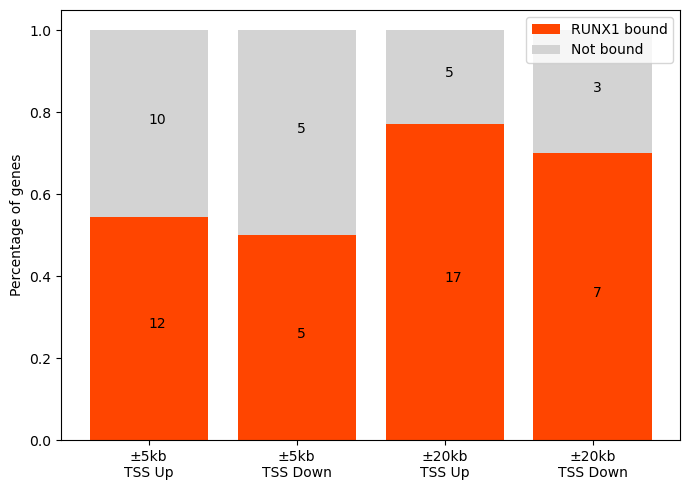

In [46]:
def count_bound(df_subset, bound_col):
    gene_counts = df_subset[['Gene Name', bound_col]].drop_duplicates()
    total = len(gene_counts)
    bound = gene_counts[bound_col].sum()
    not_bound = total-bound
    return bound, not_bound

bound_counts = {
    '±5kb TSS Up': count_bound(up, 'bound_5'),
    '±5kb TSS Down': count_bound(down, 'bound_5'),
    '±20kb TSS Up': count_bound(up, 'bound_20'),
    '±20kb TSS Down': count_bound(down, 'bound_20'),
}

data = []
for label, (bound, unbound) in bound_counts.items():
    reg, window = label.split(' ', 1)
    data.append({
        'Regulation': reg,
        'Window': window,
        'Bound': bound,
        'Unbound': unbound,
        'Total': bound+unbound
    })
plot_df = pd.DataFrame(data)
plot_df['Bound_pct'] = plot_df['Bound'] / plot_df['Total']
plot_df['Unbound_pct'] = plot_df['Unbound'] / plot_df['Total']
fig, ax = plt.subplots(figsize=(7,5))
x_labels = [f"{r}\n{w}" for r, w in zip(plot_df['Regulation'], plot_df['Window'])]

# plotting
bars1 = ax.bar(x_labels, plot_df['Bound_pct'],color='orangered',label='RUNX1 bound')
bars2 = ax.bar(x_labels, plot_df['Unbound_pct'],bottom=plot_df['Bound_pct'],color='lightgray',label='Not bound')
for i in range(len(plot_df)):
    ax.text(i, plot_df['Bound_pct'][i]/2, str(plot_df['Bound'][i]))
    ax.text(i, plot_df['Bound_pct'][i] + plot_df['Unbound_pct'][i]/2, str(plot_df['Unbound'][i]))
ax.set_ylabel("Percentage of genes")
ax.set_ylim(0, 1.05)
ax.legend()
plt.tight_layout()
plt.show()

I do observe major differences. One major thing is that after combining the chipseq and rna-seq dataframes a lot of the genes are lost. Therefore, the total count of genes as well as the proportions are not representative of the true results. Other than this differnece, is is also interesting that in my figure TSS down for both +- 5 and 20kb have less genes whilst it is relatively the same in the study. This could possibly indicate that RUNX1 binds to more upstream regions like promoters or it could just be purely due to the effects of filtering. In my opinion, the rationale behind combining both of these results and plotting this figure is to demonstrate that RUNX1 transcriptional regulation extends beyond short-range gene regulation and plays a role in both direct and indirect control of genes. 

### Track Peaks

Figure 2D

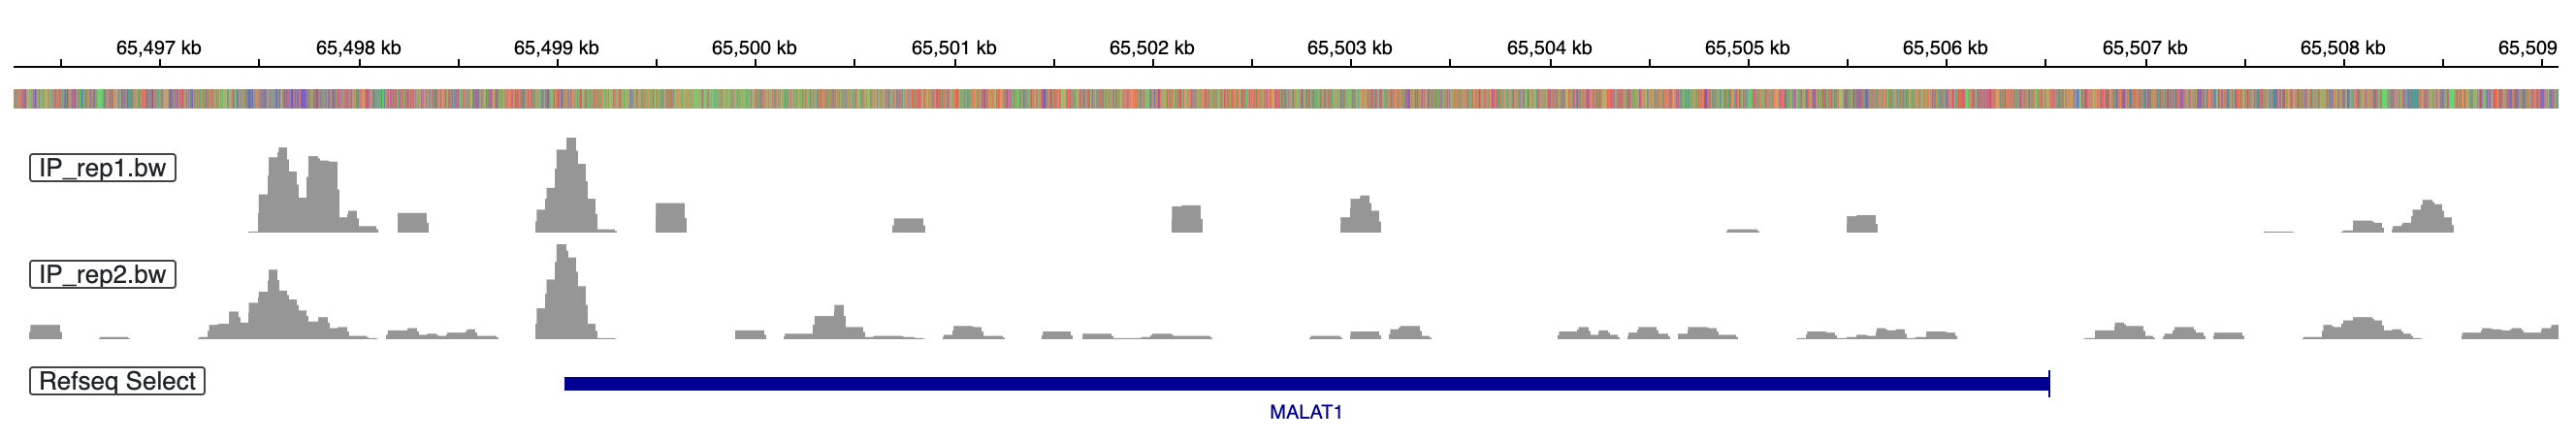

In [28]:
d = Image.open('./results/figure_2D.png')
display(d)

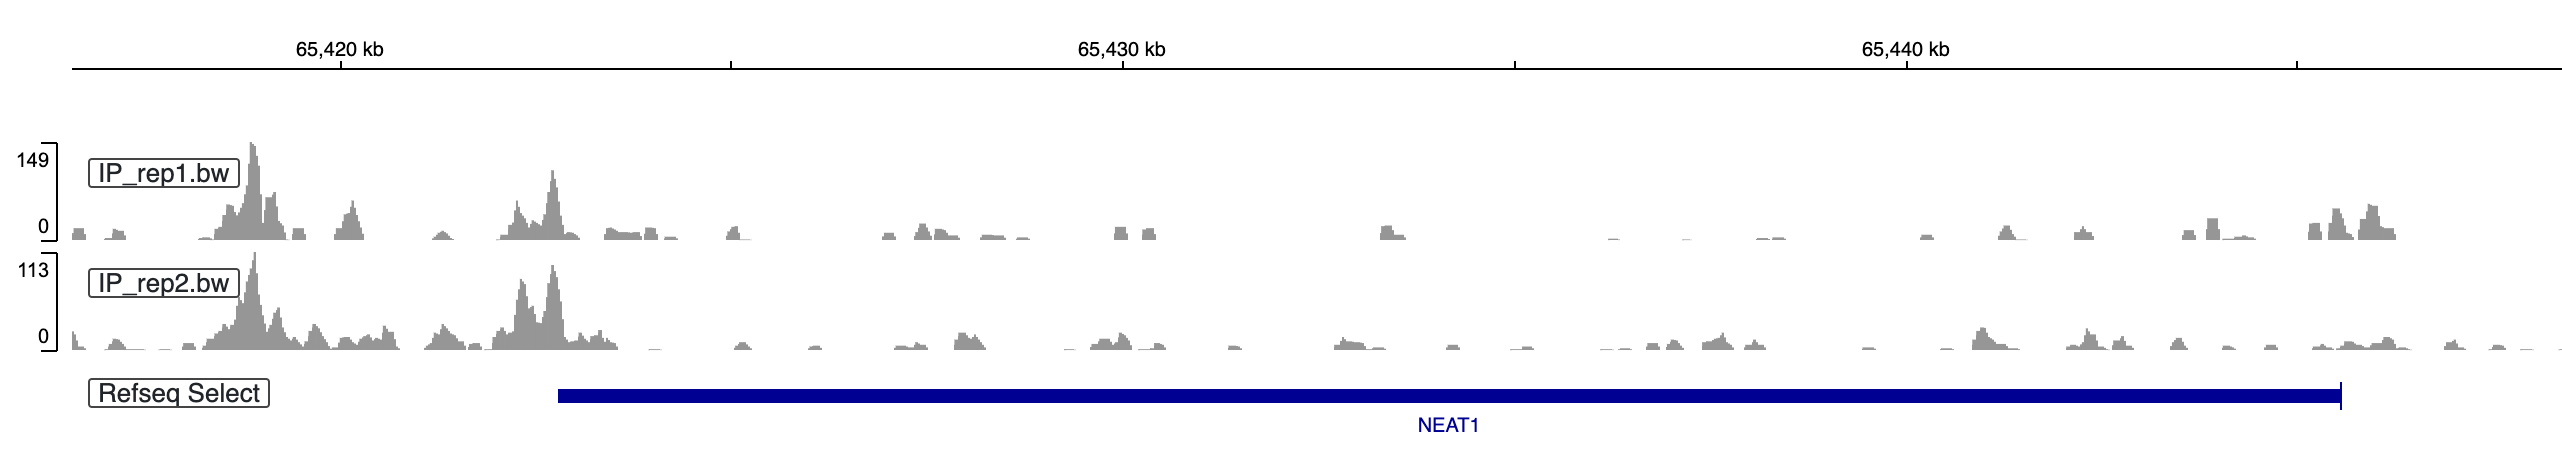

In [29]:
e = Image.open('./results/figure_2E.png')
display(e)

Based on my reuslts, I do see significant peaks near the TSS of both of the genes. It is unclear whether these are statistically siginificant, however, they do appear to be fairly similar to the peak represenations in Figure 2D and 2E in the paper.

### Supplementary Findings

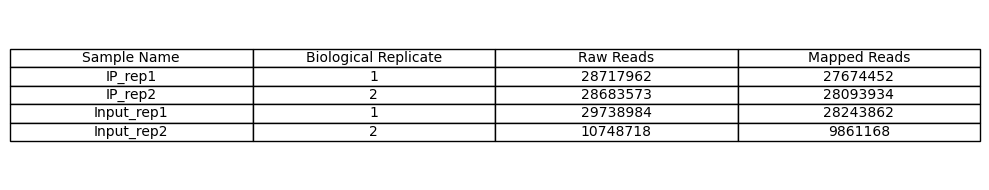

In [21]:
import matplotlib.pyplot as plt 
data = [
    {'Sample Name':'IP_rep1', 'Biological Replicate': 1, 'Raw Reads': 28717962, 'Mapped Reads': 27674452},
    {'Sample Name':'IP_rep2', 'Biological Replicate': 2, 'Raw Reads': 28683573, 'Mapped Reads': 28093934},
    {'Sample Name':'Input_rep1', 'Biological Replicate': 1, 'Raw Reads': 29738984, 'Mapped Reads': 28243862},
    {'Sample Name':'Input_rep2', 'Biological Replicate': 2, 'Raw Reads': 10748718, 'Mapped Reads': 9861168},]

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 2)) 
ax.axis('off')
table = ax.table(cellText=df.values,colLabels=df.columns,cellLoc='center',loc='center')

plt.tight_layout()
plt.show()

In general, the numbers are pretty similar for the raw reads. However, it seems that our results mapped a much greater amount of reads compared to theirs. This may be due to differences in preprocessing steps such as the use of trimmomatic, the reads were trimmed in the study but the exact method was not noted. In addition, another big factor is that we aligned our reads to hg38 whilst they mapped their reads to hg19 instead.

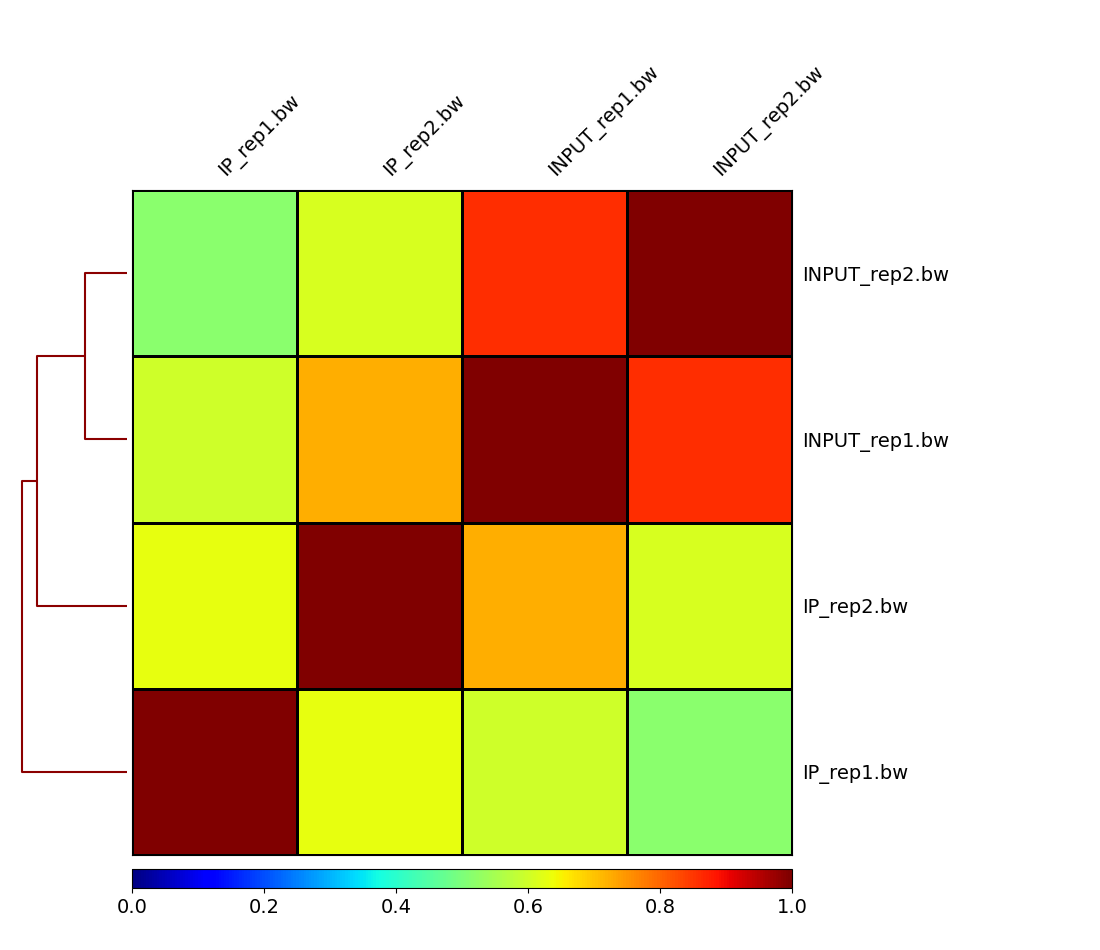

In [39]:
correlation_plot = Image.open('./full_results/correlation_heatmap.png')
display(correlation_plot)

Yes I do observe differences. The IP samples are much less correlated to each other in our results compared to the samples in the study. This could be due to differences in correlation analysis since it was not specific whether the study used pearson or spearman correlation.

From the author's point of view, this figure gave them confidence that their replicates for each group (control/ip) behaved pretty similarly and that there are no major technical variations. However, in their figure, it is also concerning that the inputs and the ips are also quite similar given fairly high coefficients of ~0.7. Thus, this makes me question the success of the experiment of whether the samples are well separated enough and also if there is substantial biological noise in the ip samples. 

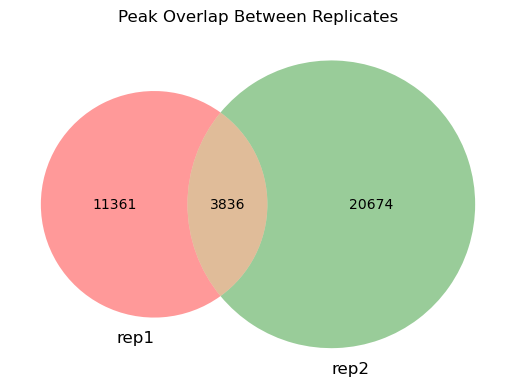

In [55]:
from matplotlib_venn import venn2

venn2(subsets=(11361,20674,3836),      
      set_labels=('rep1', 'rep2'))
plt.title("Peak Overlap Between Replicates")
plt.savefig("venn_diagram.png")
plt.show()

I obtained the number of peaks per replication from the results from MACS3, and the intersection are the number of peaks from bedtools intersection. Comparing the figures, it seems that the number of peaks in the middle are pretty similar between our findings and the studies. However, we have much more peaks in both replicates compared to what is shown. One possible explanation is that the study used the number of peaks after filtering for this venn diagram, thus drastically reducing the number of peaks. In addition, since we also have a significantly greater amount of mapped reads, this may benefit MACS2 by giving it more coverage and thus getting more sensitive peak detection

### Functional Enrichment

In [70]:
ensg = chipseq_peaks[chipseq_peaks['Entrez ID'].notna()]
ensg

,PeakID (cmd=annotatePeaks.pl filtered_peaks.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
3,rep1_peak_44,GL000216.2,149462,149842,+,1367,NaN,Intergenic,Intergenic,-56343.0,ENST00000611062.1,ENSG00000274202,ENST00000611062,NaN,NaN,U2,NaN,NaN,snRNA
7,rep1_peak_124,GL000225.1,25532,25758,+,1333,NaN,Intergenic,Intergenic,-157607.0,ENST00000621409.1,ENSG00000276711,ENST00000621409,NaN,NaN,U2,NaN,NaN,snRNA
9,rep1_peak_155,GL000225.1,85577,85762,+,1219,NaN,Intergenic,Intergenic,-97583.0,ENST00000621409.1,ENSG00000276711,ENST00000621409,NaN,NaN,U2,NaN,NaN,snRNA
11,rep1_peak_61,GL000216.2,173787,174049,+,1176,NaN,Intergenic,Intergenic,-80609.0,ENST00000611062.1,ENSG00000274202,ENST00000611062,NaN,NaN,U2,NaN,NaN,snRNA
12,rep1_peak_115,GL000225.1,6767,6990,+,1138,NaN,Intergenic,Intergenic,-176374.0,ENST00000621409.1,ENSG00000276711,ENST00000621409,NaN,NaN,U2,NaN,NaN,snRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,rep1_peak_7969,chr4,54969400,54969606,+,16,NaN,Intergenic,Intergenic,6868.0,ENST00000484463.3,ENSG00000244422,ENST00000484463,NaN,NaN,RPL38P3,NaN,NaN,processed_pseudogene
1208,rep1_peak_5678,chr2,111698935,111699076,+,16,NaN,promoter-TSS (ENST00000644013.1),lncRNA-promoter-TSS (ENST00000644013.1),28.0,ENST00000644013.1,ENSG00000285016,ENST00000645914,NaN,NaN,ENSG00000285016,NaN,NaN,lncRNA
1209,rep1_peak_9567,chr6,148554929,148555059,+,16,NaN,Intergenic,Intergenic,12660.0,ENST00000407465.1,ENSG00000217824,ENST00000407465,NaN,NaN,SNRPEP6,NaN,NaN,processed_pseudogene
1210,rep1_peak_10339,chr8,79765338,79765498,+,14,NaN,TTS (ENST00000518733.1),protein_coding-TTS (ENST00000518733.1),1057.0,ENST00000674192.1,ENSG00000164683,ENST00000674295,NaN,NaN,HEY1,NaN,NaN,protein_coding


In [67]:
genes = ensg['Entrez ID']
genes.to_csv('genes.csv', index=False)

I could not access GREAT due to private connection issues. So I first filtered out the peaks that do not have associated itrez ids, downloaded the list of genes, and then converted them to entrez ids to run DAVID enrichment analysis on the web.

In [71]:
david = pd.read_csv('./david_results.tsv', sep='\t')
david

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,UP_KW_PTM,KW-0597~Phosphoprotein,268,40.059791,4.985840e-09,"4176, 4297, 100996717, 64398, 8411, 8654, 5718...",365,8416,14268,1.244799,1.047026e-07,1.096885e-07,1.047026e-07
1,GOTERM_CC_DIRECT,GO:0005829~cytosol,183,27.354260,9.790706e-09,"9861, 9342, 8892, 4176, 4297, 8411, 8379, 8654...",469,5576,20666,1.446145,4.993248e-06,4.993260e-06,4.973679e-06
2,GOTERM_MF_DIRECT,GO:0005515~protein binding,378,56.502242,1.090568e-06,"9861, 8892, 4176, 4297, 113655, 100996717, 643...",468,13670,19208,1.134905,9.189270e-04,9.193490e-04,9.193490e-04
3,GOTERM_CC_DIRECT,GO:0043235~receptor complex,17,2.541106,3.568041e-05,"7253, 4041, 5792, 6256, 101929796, 100996717, ...",469,216,20666,3.467997,1.803276e-02,9.098505e-03,9.062825e-03
4,UP_KW_CELLULAR_COMPONENT,KW-0963~Cytoplasm,177,26.457399,4.344347e-05,"9342, 8892, 100996717, 8411, 9501, 8379, 23321...",424,5827,17932,1.284669,1.996447e-03,1.998399e-03,1.998399e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,INTERPRO,IPR029021:Prot-tyrosine_phosphatase-like,6,0.896861,9.919366e-02,"5728, 5792, 7179, 1033, 64759, 5802",483,105,20667,2.445075,1.000000e+00,1.000000e+00,9.970078e-01
445,UP_SEQ_FEATURE,MOTIF:LXXLL motif 1,3,0.448430,9.919829e-02,"8202, 85441, 8085",478,23,20502,5.594506,1.000000e+00,1.000000e+00,9.907479e-01
446,UP_SEQ_FEATURE,REPEAT:HEAT,3,0.448430,9.919829e-02,"54892, 545, 10985",478,23,20502,5.594506,1.000000e+00,1.000000e+00,9.907479e-01
447,UP_SEQ_FEATURE,MOTIF:LXXLL motif 2,3,0.448430,9.919829e-02,"8202, 85441, 8085",478,23,20502,5.594506,1.000000e+00,1.000000e+00,9.907479e-01


/scratch/336761.1.ood/ipykernel_3442458/492445490.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fold Enrichment', y='Term', data=top_df, palette='viridis')


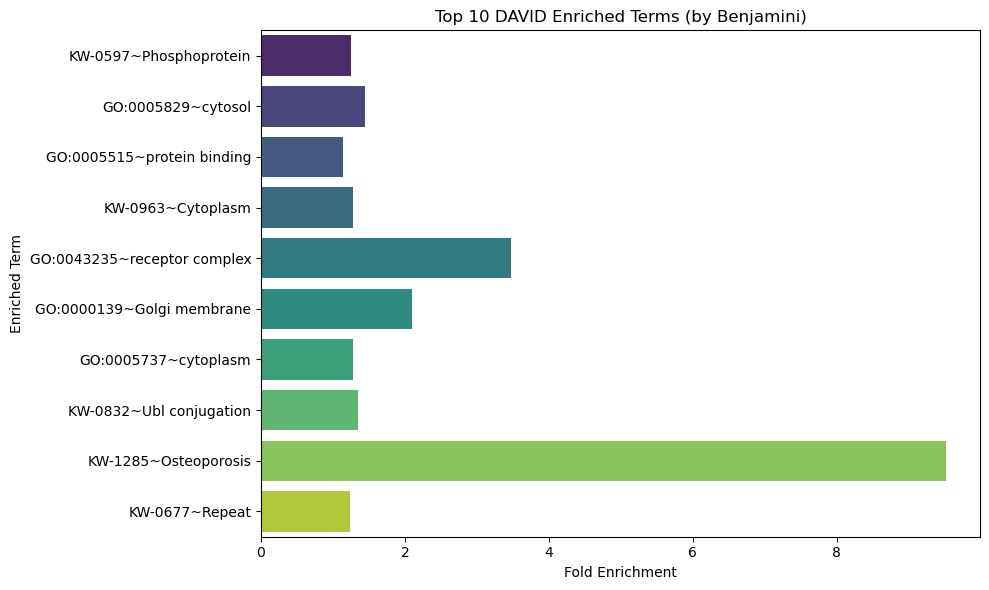

In [74]:
import seaborn as sns
david['Benjamini'] = pd.to_numeric(david['Benjamini'], errors='coerce')
top_df = david.sort_values('Benjamini').dropna().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Fold Enrichment', y='Term', data=top_df, palette='viridis')
plt.xlabel("Fold Enrichment")
plt.ylabel("Enriched Term")
plt.title("Top 10 DAVID Enriched Terms (by Benjamini)")
plt.tight_layout()
plt.show()

My DAVID enrichment results highlighted both overlapping and novel biological functions of RUNX1 compared to the study, which primarily discussed its role in chromatin organization and gene regulation in breast cancer. While my results likely confirms RUNX1’s canonical nuclear activities such as protein binding (consistent with its interactions with transcriptional cofactors), it also reveals unexpected associations with cytosolic and Golgi membrane processes, thus suggesting potential non-nuclear roles not explored in the study. Other than that, the phosphoprotein term also aligns with later evidence of RUNX1 post-translational regulation, but the osteoporosis link may reflect tissue-specific functions beyond breast cancer where current research suggests RUXN1 plays a heavy role in bone homeostatis and osteogenesis as well.